# Project 1 Work Trial

### Let's begin by exploring the dataset


#### 1. create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
Profession |Title of the account owner  | categorical
Company Size | 1- small, 2- medium, 3- large| categorical
Location | planet of the company | categorical 
Days Since Last Delivery | integer | continuous
Number of Deliveries | integer | continuous



In [263]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns

# Statistical Tests
from scipy.stats import kstest, mannwhitneyu, norm, levene
from scipy import stats

# Confidence Interval Functions
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import ztest

# Magic!
%matplotlib inline

In [264]:
df = pd.read_csv('admissions.csv');
admissions = df[pd.notnull(df)]

print admissions.head(10)

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
5      1  760.0  3.00       2.0
6      1  560.0  2.98       1.0
7      0  400.0  3.08       2.0
8      1  540.0  3.39       3.0
9      0  700.0  3.92       2.0


In [265]:
# find the admitted students

gotin = admissions[(admissions.admit == 1)]
notin = admissions[(admissions.admit == 0)]
numOfIn = len(gotin.index)
numOfNot = len(notin.index)

print "admitted:", numOfIn
print "not admitted:", numOfNot
print "total:", len(admissions.index)

print gotin.describe()
print notin.describe()

admitted: 127
not admitted: 273
total: 400
       admit         gre         gpa    prestige
count  127.0  127.000000  126.000000  126.000000
mean     1.0  618.897638    3.489206    2.150794
std      0.0  108.884884    0.371655    0.921455
min      1.0  300.000000    2.420000    1.000000
25%      1.0  540.000000    3.220000    1.000000
50%      1.0  620.000000    3.545000    2.000000
75%      1.0  680.000000    3.757500    3.000000
max      1.0  800.000000    4.000000    4.000000
       admit         gre         gpa    prestige
count  273.0  271.000000  272.000000  273.000000
mean     0.0  573.579336    3.345404    2.641026
std      0.0  116.052798    0.376773    0.917198
min      0.0  220.000000    2.260000    1.000000
25%      0.0  500.000000    3.080000    2.000000
50%      0.0  580.000000    3.340000    3.000000
75%      0.0  660.000000    3.610000    3.000000
max      0.0  800.000000    4.000000    4.000000


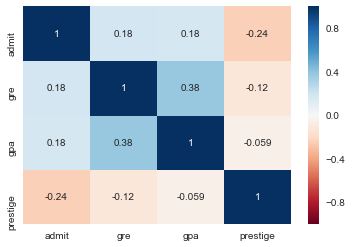

In [266]:
#find correlation
adm_corr = admissions.corr()[admissions.corr() != 1]
sns.heatmap(admissions.corr(), annot=True, cmap='RdBu')


In [267]:
pd.DataFrame(list(zip(adm_corr.columns, adm_corr.idxmax(), adm_corr.max())), columns=['Var1', 'Var2', 'Cor'])\
  .sort_values('Cor', ascending=False)

,Var1,Var2,Cor
1,gre,gpa,0.382408
2,gpa,gre,0.382408
0,admit,gre,0.182919
3,prestige,gpa,-0.059031


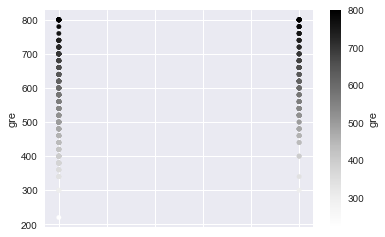

In [268]:
admissions.plot(x='admit', y='gre', c='gre', kind='scatter')

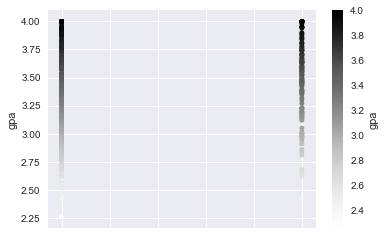

In [269]:
admissions.plot(x='admit', y='gpa', c='gpa', kind='scatter')

In [270]:
#separate out the columns
gre = admissions[pd.notnull(admissions.gre)].gre #red
gpa = admissions[pd.notnull(admissions.gpa)].gpa #green
pres = admissions[pd.notnull(admissions.prestige)].prestige #blue

all_stats = admissions.describe()
gre_stats = all_stats['gre'] #or admissions.gre.describe()
print all_stats['gre']

count    398.000000
mean     588.040201
std      115.628513
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64


KstestResult(statistic=1.0, pvalue=0.0)

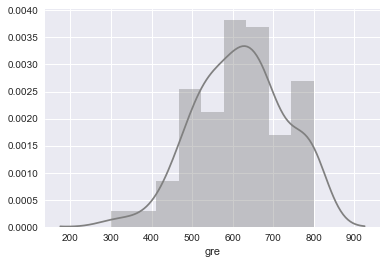

In [282]:
greIn = gotin[pd.notnull(gotin.gre)].gre #grey
sns.distplot(greIn, color='grey')

In [271]:
#find fences for gre scores
Q1 = gre_stats[4]
Q3 = gre_stats[6]

IQR = Q3-Q1

Low_Fence = Q1 - 1.5 * IQR
Hi_Fence = Q3 + 1.5 * IQR

print 'IQR', IQR
print 'Low fence:', Low_Fence
print 'High fence:', Hi_Fence

greOuts = admissions[(admissions.gre < Low_Fence) & (admissions.gre > Hi_Fence)]
print greOuts

IQR 140.0
Low fence: 310.0
High fence: 870.0
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []


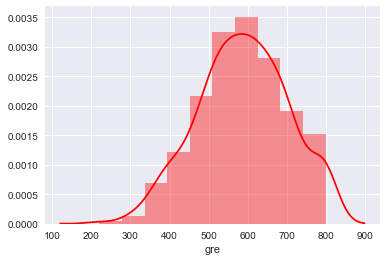

In [272]:
sns.distplot(gre, color='red', bins=10)

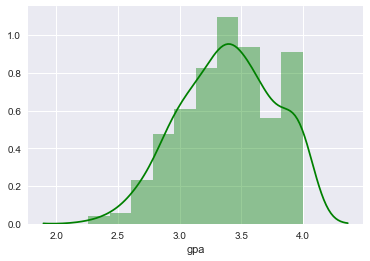

In [273]:
sns.distplot(gpa, color='green', bins=10)

0    3.0
1    3.0
2    1.0
3    4.0
4    4.0
Name: prestige, dtype: float64

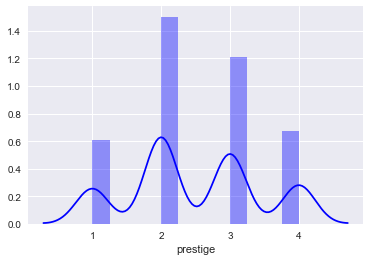

In [274]:
sns.distplot(pres, color='blue')
pres.head(5)

In [275]:
print kstest(gre, 'norm')
print kstest(gpa, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.98972718363537604, pvalue=0.0)
